In [4]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [5]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
torch.manual_seed(42)
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('sox_io')

import matplotlib.pyplot as plt
import requests
from utils import *
from wingbeat_datasets import *
from wingbeat_models import *


In [6]:
num_epochs = 35
batch_size = 32
batch_size_val = batch_size * 2
validation_split = .2
shuffle_dataset = True
num_workers = psutil.cpu_count()
random_seed= 42
setting = 'raw'
modeltype = 'wingbeatraw'
normalize = ''#"sample"

fs = 8000

dsname = "twin_cages_experiment/sensorSD/through_entrances_v2"

In [7]:
transforms_list = [FilterWingbeat(setting='bandpass')]#, TransformWingbeat(setting='psd')]

wbdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
psdset = WingbeatsDataset(dsname=dsname, clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)

Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.
Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.


In [8]:
# plt.plot(wbdset[0][0].T)
# plt.plot(psdset[0][0].T)

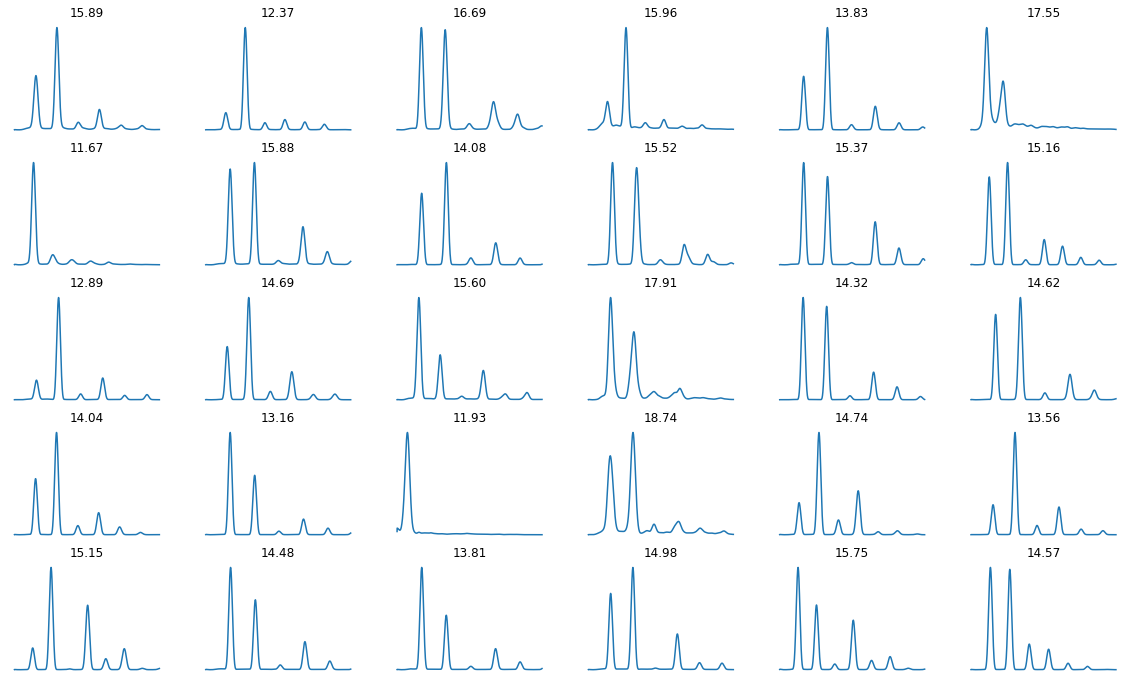

In [9]:
rands = np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

np.random.choice(range(len(wbdset)), len(wbdset), replace=False)

plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)
    
    sig = psdset[rands[i]][0][0,:1600]
    plt.plot(sig.T)
#     plt.title(f"{psdset.sums[i]:.1f}", y=.6)
    plt.title(f"{sig.sum():.2f}")
    plt.axis('off')

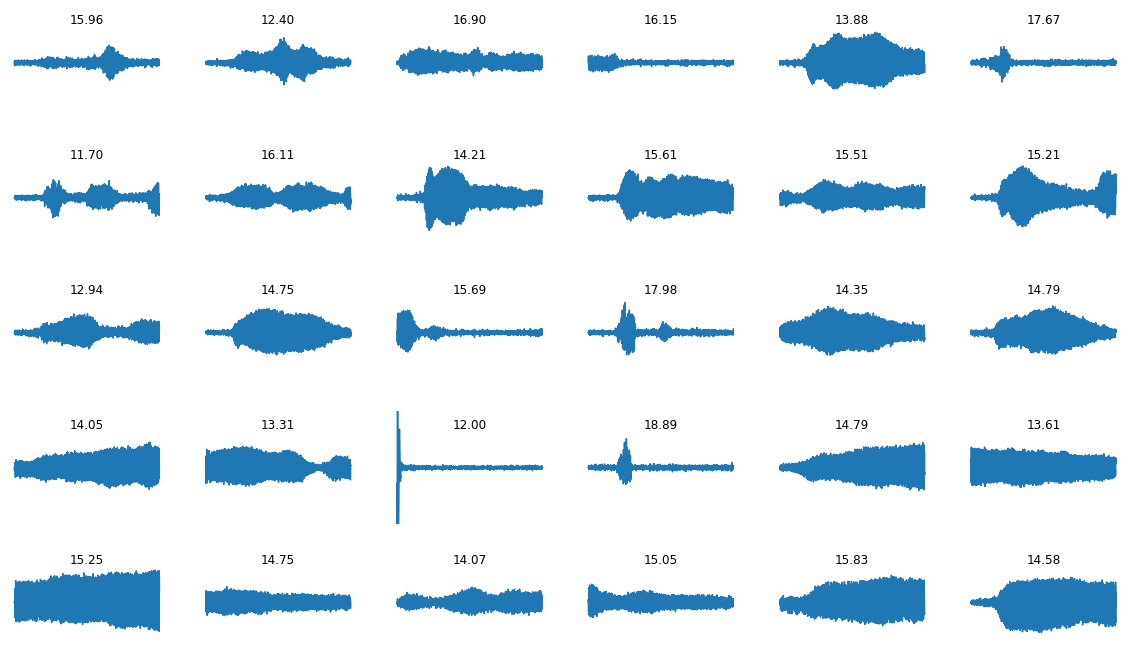

In [10]:
plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)
    
    sig = wbdset[rands[i]][0]
    plt.plot(sig.T)
    plt.title(f"{wbdset.sums[rands[i]]:.2f}", y=.8)#, absum:{sig.abs().sum():.4f}")
    plt.axis('off')
    plt.ylim(-.065,.065)

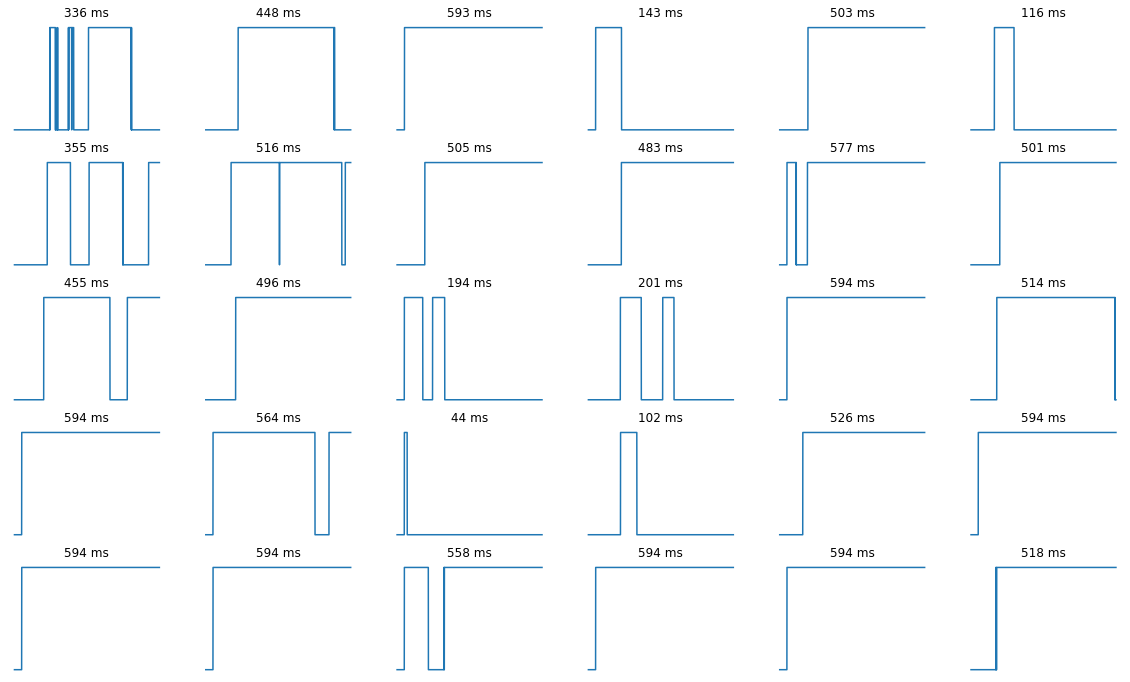

In [11]:
plt.figure(figsize=(20,12))
for i in range(30):
    plt.subplot(5,6,i+1)

    sig = wbdset[rands[i]][0]
    sig = pd.Series(sig.squeeze())
    sig = sig.abs().rolling(250).mean()
    sig = (sig>0.0025).astype(int)
    sig.plot()
    plt.title(f"{wingbeat_duration(sig, rolling_window=250,fs=fs):.0f} ms")
    plt.axis('off')

## Calculate mean flight duration for datasets

In [ ]:
wbdset = WingbeatsDataset(dsname="twin_cages_experiment/sensorSD/through_entrances_v1", clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_WBduration_from_loader(dloader, fs=fs)[1:]

In [12]:
wbdset = WingbeatsDataset(dsname="twin_cages_experiment/sensorSD/through_entrances_v2", clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_WBduration_from_loader(dloader, fs=fs)[1:]

  0%|          | 0/5 [00:00<?, ?it/s]

Found 146 in dataset: twin_cages_experiment/sensorSD/through_entrances_v2, and 1 label(s): ['sensorSD']
No custom label applied.


100%|██████████| 5/5 [00:00<00:00,  5.89it/s]


(403.00085616438355, 491.4375, 195.35834680896377)

In [ ]:
wbdset = WingbeatsDataset(dsname="Suzukii_RL/Y", clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_WBduration_from_loader(dloader, fs=fs)[1:]

In [ ]:
wbdset = WingbeatsDataset(dsname="Suzukii_RL/X", clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_WBduration_from_loader(dloader, fs=fs)[1:]

In [ ]:
wbdset = WingbeatsDataset(dsname="Suzukii_RL/L", clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_WBduration_from_loader(dloader, fs=fs)[1:]

In [ ]:
wbdset = WingbeatsDataset(dsname="Suzukii_RL/R", clean=True, verbose=True, transform=FilterWingbeat(setting='bandpass'))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_WBduration_from_loader(dloader, fs=fs)[1:]

## Power Spectral Density of datasets

In [ ]:
plt.figure(figsize=(20,12))
psdset = WingbeatsDataset(dsname="twin_cages_experiment/sensorSD", clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(psdset, batch_size=32, num_workers=16)
get_medianWBDset_psd_from_loader(dloader).plot()

wbdset = WingbeatsDataset(dsname="Suzukii_RL/X", clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_medianWBDset_psd_from_loader(dloader).plot()

plt.legend(['twin','X'])

In [ ]:
plt.figure(figsize=(20,12))

wbdset = WingbeatsDataset(dsname="Suzukii_RL/X", clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_medianWBDset_psd_from_loader(dloader).plot()

wbdset = WingbeatsDataset(dsname="Suzukii_RL/Y", clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_medianWBDset_psd_from_loader(dloader).plot()

wbdset = WingbeatsDataset(dsname="Suzukii_RL/L", clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_medianWBDset_psd_from_loader(dloader).plot()

wbdset = WingbeatsDataset(dsname="Suzukii_RL/R", clean=True, verbose=True, transform=transforms.Compose([FilterWingbeat(setting='bandpass'), TransformWingbeat(setting='psdl2')]))
dloader = DataLoader(wbdset, batch_size=32, num_workers=16)
get_medianWBDset_psd_from_loader(dloader).plot()

plt.legend(['X','Y','L','R'])

In [38]:
mat = np.array([wbdset[i][0].numpy() for i in range(len(wbdset))])

In [42]:
mat = mat.squeeze()

In [43]:
from tslearn.utils import to_time_series_dataset

In [45]:
to_time_series_dataset(mat).shape

(146, 5000, 1)

In [46]:
df = pd.DataFrame()
for i, ts in enumerate(mat):
    data = [[x, i] for x in ts]
    df = df.append(data, ignore_index=True)
df.columns = ['value', 'id']

In [49]:
import tsfresh
tf=tsfresh.extract_features(df, column_id='id')

Feature Extraction: 100%|██████████| 37/37 [07:19<00:00, 11.89s/it]


In [51]:
tf.shape

(146, 779)